In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [ ]:
AAPL = pd.read_csv("/content/drive/MyDrive/Database/Pre_Processed_AAPL.csv")

### Data Proprocessing

**Univariate Dataaset function (Data pre processing)**

In [ ]:
def Dataset(Data, Date):

  Train_Data = Data['Adj. Close'][Data['Date'] < Date].to_numpy()
  Data_Train = []
  Data_Train_X = []
  Data_Train_Y = []
  for i in range(0, len(Train_Data), 5):
    try:
      Data_Train.append(Train_Data[i : i + 5])
    except:
      pass

  if len(Data_Train[-1]) < 5:
    Data_Train.pop(-1)
  
  Data_Train_X = Data_Train[0 : -1]
  Data_Train_X = np.array(Data_Train_X)
  Data_Train_X = Data_Train_X.reshape((-1, 5, 1))
  Data_Train_Y = Data_Train[1 : len(Data_Train)]
  Data_Train_Y = np.array(Data_Train_Y)
  Data_Train_Y = Data_Train_Y.reshape((-1, 5, 1))


  Test_Data = Data['Adj. Close'][Data['Date'] >= Date].to_numpy()
  Data_Test = []
  Data_Test_X = []
  Data_Test_Y = []
  for i in range(0, len(Test_Data), 5):
    try:
      Data_Test.append(Test_Data[i : i + 5])
    except:
      pass

  if len(Data_Test[-1]) < 5:
    Data_Test.pop(-1)
  
  Data_Test_X = Data_Test[0 : -1]
  Data_Test_X = np.array(Data_Test_X)
  Data_Test_X = Data_Test_X.reshape((-1, 5, 1))
  Data_Test_Y = Data_Test[1 : len(Data_Test)]
  Data_Test_Y = np.array(Data_Test_Y)
  Data_Test_Y = Data_Test_Y.reshape((-1, 5, 1))

  return Data_Train_X, Data_Train_Y, Data_Test_X, Data_Test_Y

**Multivariate Dataaset function (Data pre processing)**

In [ ]:
def Dataset1(Data, Date):

  l1 = Data['Adj. Close'][Data['Date'] < Date].to_numpy()
  l2 = Data['Open'][Data['Date'] < Date].to_numpy()
  l3 = Data['Close'][Data['Date'] < Date].to_numpy()
  l4 = Data['High'][Data['Date'] < Date].to_numpy()
  l5 = Data['Low'][Data['Date'] < Date].to_numpy()
  l11 = Data['Volume'][Data['Date'] < Date].to_numpy()
  train_x = np.zeros((1447,5,5))
  train_y = np.zeros((1447,5,1))
  for i in range(l1.shape[0]-4):
    l_temp= []
    l1_temp = []
    try:
      for j in range(i,i+5):
        l_temp.append([l2[j],l3[j],l4[j],l5[j],l11[j]])
        l1_temp.append([l1[j]])
    except:
      pass
    if l_temp:
      train_x[i,:,:] = np.asarray(l_temp)
    if l1_temp:
      train_y[i,:,:] = np.asarray(l1_temp)
  train_x.reshape(-1,5,5)
  train_y.reshape(-1,5,1)

  l6 = Data['Adj. Close'][Data['Date'] >= Date].to_numpy()
  l7 = Data['Open'][Data['Date'] >= Date].to_numpy()
  l8 = Data['Close'][Data['Date'] >= Date].to_numpy()
  l9 = Data['High'][Data['Date'] >= Date].to_numpy()
  l10 = Data['Low'][Data['Date'] >= Date].to_numpy()
  l12 = Data['Volume'][Data['Date'] >= Date].to_numpy()
  test_x = np.zeros((1447,5,5))
  test_y = np.zeros((1447,5,1))
  for i in range(l6.shape[0]-4):
    l_temp= []
    l1_temp = []
    try:
      for j in range(i,i+5):
        l_temp.append([l7[j],l8[j],l9[j],l10[j],l12[j]])
        l1_temp.append([l6[j]])
    except:
      pass
    if l_temp:
      test_x[i,:,:] = np.asarray(l_temp)
    if l1_temp:
      test_y[i,:,:] = np.asarray(l1_temp)
  test_x.reshape(-1,5,5)
  test_y.reshape(-1,5,1)

  return train_x , train_y , test_x , test_y
  
  

### Model

**univariate LSTM 5*1**



In [ ]:
def Model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = False),
                                      tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
  return model

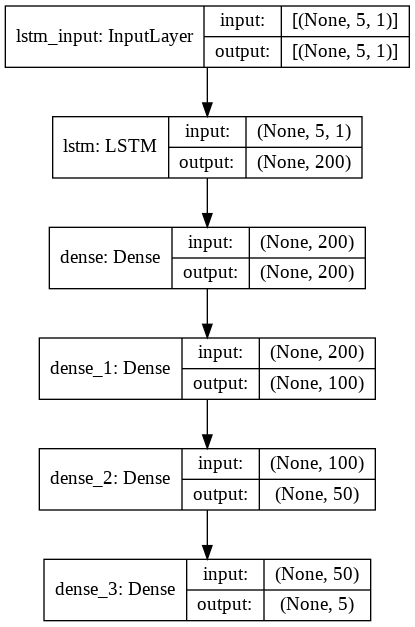

In [ ]:
model = Model()
tf.keras.utils.plot_model(model, show_shapes=True)

**univariate LSTM 10*1**


In [ ]:
def Model1():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (10, 1), activation = tf.nn.leaky_relu, return_sequences = False),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
  return model

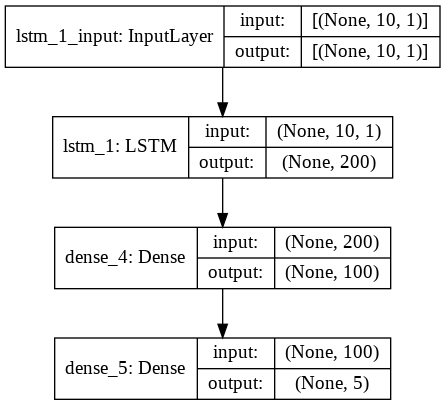

In [ ]:
model1 = Model1()
tf.keras.utils.plot_model(model1, show_shapes=True)

**Univariate encoder decoder LSTM 10*1**

In [ ]:
def Model2():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (10, 1), activation = tf.nn.leaky_relu, return_sequences = False),
                                      tf.keras.layers.RepeatVector(5),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.TimeDistributed((tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu))),
                                      tf.keras.layers.TimeDistributed((tf.keras.layers.Dense(1, activation = tf.nn.leaky_relu)))
                                      ])
                                  
  return model

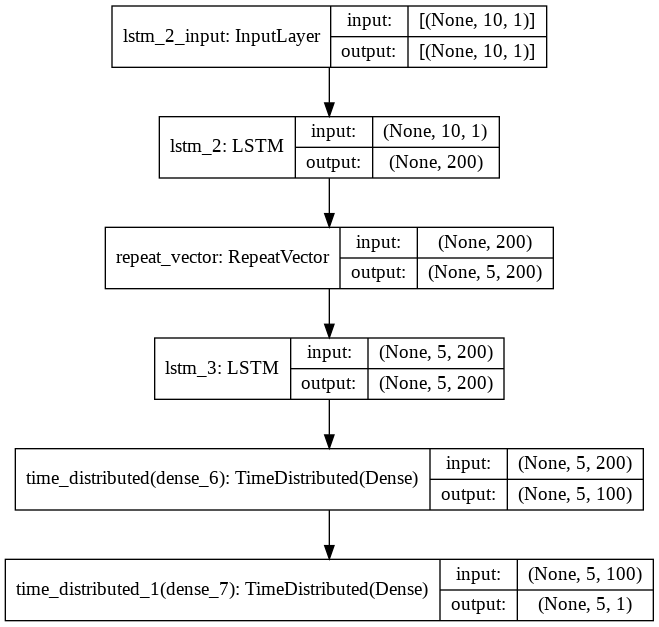

In [ ]:
model2 = Model2()
tf.keras.utils.plot_model(model2, show_shapes=True)

**Multivariate LSTM 10*5**

In [ ]:
def Model3():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (10, 5), activation = tf.nn.leaky_relu, return_sequences = False),
                                      tf.keras.layers.RepeatVector(5),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.TimeDistributed((tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu))),
                                      tf.keras.layers.TimeDistributed((tf.keras.layers.Dense(1, activation = tf.nn.leaky_relu)))
                                      ])
  return model

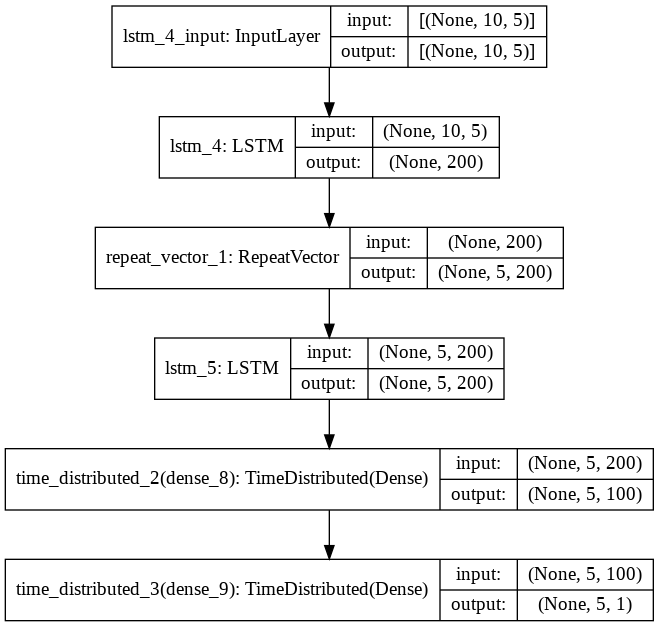

In [ ]:
model3 = Model3()
tf.keras.utils.plot_model(model3, show_shapes=True)

In [ ]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 200)               164800    
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 5, 200)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 5, 200)            320800    
_________________________________________________________________
time_distributed_2 (TimeDist (None, 5, 100)            20100     
_________________________________________________________________
time_distributed_3 (TimeDist (None, 5, 1)              101       
Total params: 505,801
Trainable params: 505,801
Non-trainable params: 0
_________________________________________________________________


### Custom Learning Rate

In [ ]:
def scheduler(epoch):
  
  if epoch <= 150:
    lrate = (10 ** -5) * (epoch / 150) 
  elif epoch <= 400:
    initial_lrate = (10 ** -5)
    k = 0.01
    lrate = initial_lrate * math.exp(-k * (epoch - 150))
  else:
    lrate = (10 ** -6)
  
  return lrate

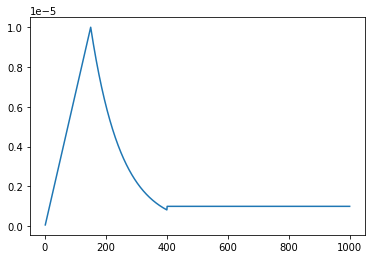

In [ ]:
epochs = [i for i in range(1, 1001, 1)]
lrate = [scheduler(i) for i in range(1, 1001, 1)]
plt.plot(epochs, lrate)

In [ ]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

**Dataset Visualization**

In [ ]:
AAPL.head()

,Date,Open,High,Low,Close,Adj. Close,Volume
0,2015-01-02,27.85,27.86,26.84,27.33,24.86,212818400.0
1,2015-01-05,27.07,27.16,26.35,26.56,24.16,257142000.0
2,2015-01-06,26.64,26.86,26.16,26.57,24.16,263188400.0
3,2015-01-07,26.80,27.05,26.67,26.94,24.50,160423600.0
4,2015-01-08,27.31,28.04,27.17,27.97,25.44,237458000.0


In [ ]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1549 non-null   object 
 1   Open        1549 non-null   float64
 2   High        1549 non-null   float64
 3   Low         1549 non-null   float64
 4   Close       1549 non-null   float64
 5   Adj. Close  1549 non-null   float64
 6   Volume      1549 non-null   float64
dtypes: float64(6), object(1)
memory usage: 84.8+ KB


In [ ]:
# Change Dtype of Date column
AAPL["Date"] = pd.to_datetime(AAPL["Date"])

###Split the Data into Training and Test set
    Training Period: 2015-01-02 - 2020-09-30

    Testing Period:  2020-10-01 - 2021-02-26

### Model Fitting

#### Model


In [ ]:
AAPL_Date = '2020-10-01'
AAPL_Train_X, AAPL_Train_Y, AAPL_Test_X, AAPL_Test_Y = Dataset(AAPL, AAPL_Date)
AAPL_Model = Model()

In [ ]:
AAPL_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [ ]:
AAPL_hist = AAPL_Model.fit(AAPL_Train_X, AAPL_Train_Y, epochs = 100, validation_data = (AAPL_Test_X, AAPL_Test_Y), callbacks=[callback])


Epoch 1/100
9/9 [==============================] - 2s 50ms/step - loss: 2307.0220 - root_mean_squared_error: 48.0315 - val_loss: 15701.3242 - val_root_mean_squared_error: 125.3049
Epoch 2/100
9/9 [==============================] - 0s 17ms/step - loss: 2306.9988 - root_mean_squared_error: 48.0312 - val_loss: 15700.9766 - val_root_mean_squared_error: 125.3035
Epoch 3/100
9/9 [==============================] - 0s 16ms/step - loss: 2306.9172 - root_mean_squared_error: 48.0304 - val_loss: 15700.3027 - val_root_mean_squared_error: 125.3008
Epoch 4/100
9/9 [==============================] - 0s 17ms/step - loss: 2306.7856 - root_mean_squared_error: 48.0290 - val_loss: 15699.2686 - val_root_mean_squared_error: 125.2967
Epoch 5/100
9/9 [==============================] - 0s 17ms/step - loss: 2306.5896 - root_mean_squared_error: 48.0270 - val_loss: 15697.9346 - val_root_mean_squared_error: 125.2914
Epoch 6/100
9/9 [==============================] - 0s 16ms/step - loss: 2306.3474 - root_mean_square

In [ ]:
history_dict = AAPL_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

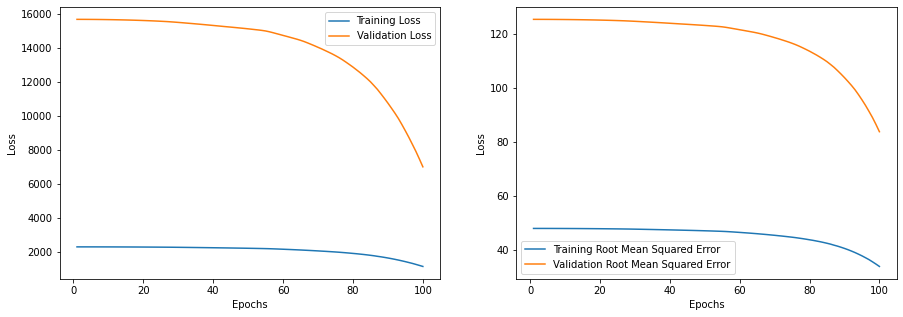

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

##### Predicting the closing stock price of Apple

In [ ]:
AAPL_prediction = AAPL_Model.predict(AAPL_Test_X)

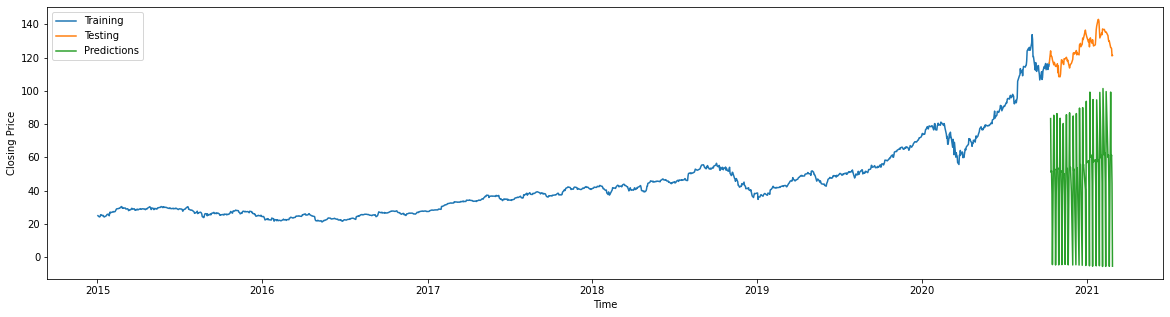

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(AAPL['Date'][AAPL['Date'] < '2020-10-12'], AAPL['Adj. Close'][AAPL['Date'] < '2020-10-12'], label = 'Training')
plt.plot(AAPL['Date'][AAPL['Date'] >= '2020-10-09'], AAPL['Adj. Close'][AAPL['Date'] >= '2020-10-09'], label = 'Testing')
plt.plot(AAPL['Date'][AAPL['Date'] >= '2020-10-12'], AAPL_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [ ]:
rmse = math.sqrt(mean_squared_error(AAPL_Test_Y.reshape(-1, 5), AAPL_prediction))
mape = np.mean(np.abs(AAPL_prediction - AAPL_Test_Y.reshape(-1, 5))/np.abs(AAPL_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 83.78567069624017
MAPE: 0.6197203883585501


#### Model1



In [ ]:
AAPL_Date = '2020-10-01'
AAPL_Train_X, AAPL_Train_Y, AAPL_Test_X, AAPL_Test_Y = Dataset(AAPL, AAPL_Date)
AAPL_Model = Model1()

In [ ]:
AAPL_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [ ]:
AAPL_hist = AAPL_Model.fit(AAPL_Train_X, AAPL_Train_Y, epochs = 1000, validation_data = (AAPL_Test_X, AAPL_Test_Y), callbacks=[callback])


Epoch 1/1000
9/9 [==============================] - 1s 47ms/step - loss: 2340.6362 - root_mean_squared_error: 48.3801 - val_loss: 16014.0547 - val_root_mean_squared_error: 126.5467
Epoch 2/1000
9/9 [==============================] - 0s 16ms/step - loss: 2340.6187 - root_mean_squared_error: 48.3799 - val_loss: 16013.7734 - val_root_mean_squared_error: 126.5455
Epoch 3/1000
9/9 [==============================] - 0s 14ms/step - loss: 2340.5608 - root_mean_squared_error: 48.3793 - val_loss: 16013.2256 - val_root_mean_squared_error: 126.5434
Epoch 4/1000
9/9 [==============================] - 0s 15ms/step - loss: 2340.4548 - root_mean_squared_error: 48.3782 - val_loss: 16012.4668 - val_root_mean_squared_error: 126.5404
Epoch 5/1000
9/9 [==============================] - 0s 15ms/step - loss: 2340.3186 - root_mean_squared_error: 48.3768 - val_loss: 16011.3848 - val_root_mean_squared_error: 126.5361
Epoch 6/1000
9/9 [==============================] - 0s 16ms/step - loss: 2340.1428 - root_mean_

In [ ]:
history_dict = AAPL_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

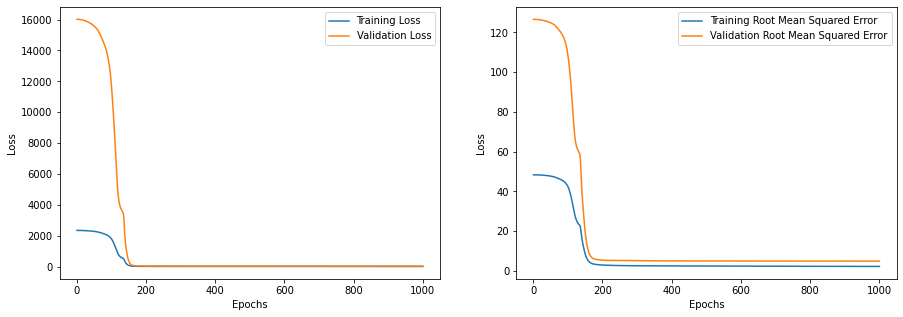

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

##### Predicting the closing stock price of Apple

In [ ]:
AAPL_prediction = AAPL_Model.predict(AAPL_Test_X)

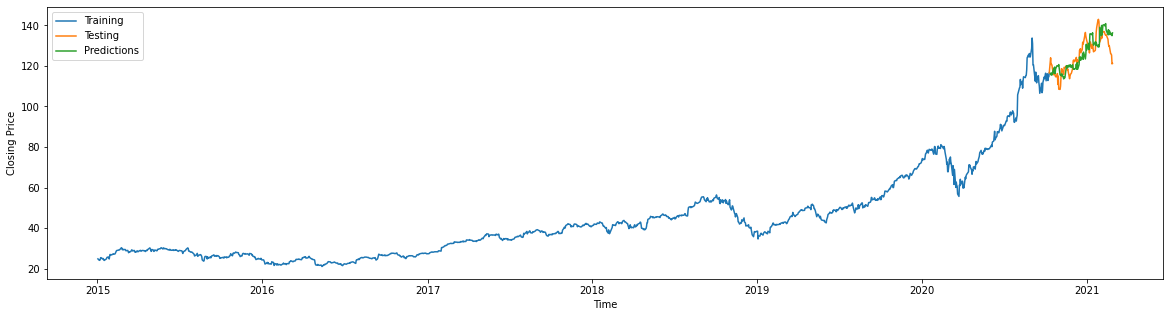

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(AAPL['Date'][AAPL['Date'] < '2020-10-12'], AAPL['Adj. Close'][AAPL['Date'] < '2020-10-12'], label = 'Training')
plt.plot(AAPL['Date'][AAPL['Date'] >= '2020-10-09'], AAPL['Adj. Close'][AAPL['Date'] >= '2020-10-09'], label = 'Testing')
plt.plot(AAPL['Date'][AAPL['Date'] >= '2020-10-12'], AAPL_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [ ]:
rmse = math.sqrt(mean_squared_error(AAPL_Test_Y.reshape(-1, 5), AAPL_prediction))
mape = np.mean(np.abs(AAPL_prediction - AAPL_Test_Y.reshape(-1, 5))/np.abs(AAPL_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 4.978811362670351
MAPE: 0.03274024290506776


#### Model2


In [ ]:
AAPL_Date = '2020-10-01'
AAPL_Train_X, AAPL_Train_Y, AAPL_Test_X, AAPL_Test_Y = Dataset(AAPL, AAPL_Date)
AAPL_Model = Model2()

In [ ]:
AAPL_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [ ]:
AAPL_hist = AAPL_Model.fit(AAPL_Train_X, AAPL_Train_Y, epochs = 1000, validation_data = (AAPL_Test_X, AAPL_Test_Y), callbacks=[callback])


Epoch 1/1000
9/9 [==============================] - 2s 78ms/step - loss: 2283.5989 - root_mean_squared_error: 47.7870 - val_loss: 15489.3604 - val_root_mean_squared_error: 124.4563
Epoch 2/1000
9/9 [==============================] - 0s 33ms/step - loss: 2283.5447 - root_mean_squared_error: 47.7864 - val_loss: 15488.5186 - val_root_mean_squared_error: 124.4529
Epoch 3/1000
9/9 [==============================] - 0s 34ms/step - loss: 2283.3501 - root_mean_squared_error: 47.7844 - val_loss: 15486.9062 - val_root_mean_squared_error: 124.4464
Epoch 4/1000
9/9 [==============================] - 0s 33ms/step - loss: 2283.0439 - root_mean_squared_error: 47.7812 - val_loss: 15484.2734 - val_root_mean_squared_error: 124.4358
Epoch 5/1000
9/9 [==============================] - 0s 34ms/step - loss: 2282.5823 - root_mean_squared_error: 47.7764 - val_loss: 15480.9043 - val_root_mean_squared_error: 124.4223
Epoch 6/1000
9/9 [==============================] - 0s 32ms/step - loss: 2282.0103 - root_mean_

In [ ]:
history_dict = AAPL_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

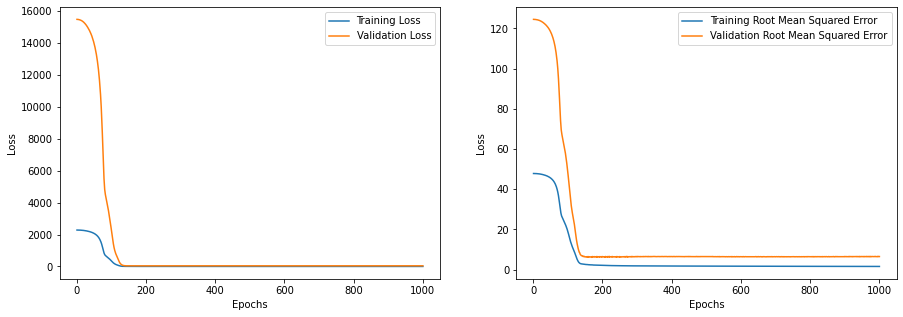

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

##### Predicting the closing stock price of Apple

In [ ]:
AAPL_prediction = AAPL_Model.predict(AAPL_Test_X)

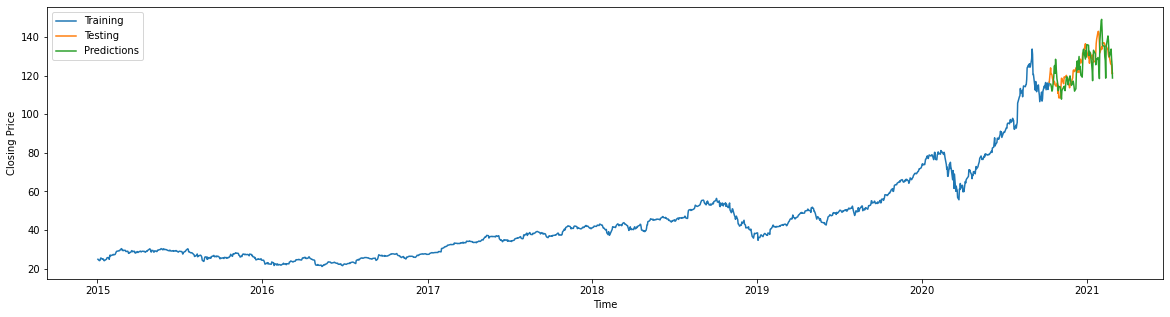

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(AAPL['Date'][AAPL['Date'] < '2020-10-12'], AAPL['Adj. Close'][AAPL['Date'] < '2020-10-12'], label = 'Training')
plt.plot(AAPL['Date'][AAPL['Date'] >= '2020-10-09'], AAPL['Adj. Close'][AAPL['Date'] >= '2020-10-09'], label = 'Testing')
plt.plot(AAPL['Date'][AAPL['Date'] >= '2020-10-12'], AAPL_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [ ]:
print(AAPL)

           Date    Open    High     Low   Close  Adj. Close       Volume
0    2015-01-02   27.85   27.86   26.84   27.33       24.86  212818400.0
1    2015-01-05   27.07   27.16   26.35   26.56       24.16  257142000.0
2    2015-01-06   26.64   26.86   26.16   26.57       24.16  263188400.0
3    2015-01-07   26.80   27.05   26.67   26.94       24.50  160423600.0
4    2015-01-08   27.31   28.04   27.17   27.97       25.44  237458000.0
...         ...     ...     ...     ...     ...         ...          ...
1544 2021-02-22  128.01  129.72  125.60  126.00      126.00  103607600.0
1545 2021-02-23  123.76  126.71  118.39  125.86      125.86  157859100.0
1546 2021-02-24  124.94  125.56  122.23  125.35      125.35  110691500.0
1547 2021-02-25  124.68  126.46  120.54  120.99      120.99  147306500.0
1548 2021-02-26  122.59  124.85  121.20  121.26      121.26  164320000.0

[1549 rows x 7 columns]


In [ ]:
rmse = math.sqrt(mean_squared_error(AAPL_Test_Y.reshape(-1, 5), AAPL_prediction.reshape(-1, 5)))
mape = np.mean(np.abs(AAPL_prediction.reshape(-1, 5) - AAPL_Test_Y.reshape(-1, 5))/np.abs(AAPL_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 6.48866091896689
MAPE: 0.03627507839411322


#### Model3



In [ ]:
AAPL_Date = '2020-10-01'
AAPL_Train_X, AAPL_Train_Y, AAPL_Test_X, AAPL_Test_Y = Dataset1(AAPL, AAPL_Date)
AAPL_Model = Model3()

In [ ]:
AAPL_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [ ]:
AAPL_hist = AAPL_Model.fit(AAPL_Train_X, AAPL_Train_Y, epochs = 1000, validation_data = (AAPL_Test_X, AAPL_Test_Y), callbacks=[callback])


Epoch 1/1000
46/46 [==============================] - 4s 50ms/step - loss: 1027130982400.0000 - root_mean_squared_error: 1013474.6875 - val_loss: 25670629376.0000 - val_root_mean_squared_error: 160220.5781
Epoch 2/1000
46/46 [==============================] - 2s 42ms/step - loss: 1024922157056.0000 - root_mean_squared_error: 1012384.3125 - val_loss: 25591130112.0000 - val_root_mean_squared_error: 159972.2656
Epoch 3/1000
46/46 [==============================] - 2s 43ms/step - loss: 1022185504768.0000 - root_mean_squared_error: 1011031.8750 - val_loss: 25351669760.0000 - val_root_mean_squared_error: 159222.0625
Epoch 4/1000
46/46 [==============================] - 2s 43ms/step - loss: 1016399069184.0000 - root_mean_squared_error: 1008166.1875 - val_loss: 25117599744.0000 - val_root_mean_squared_error: 158485.3438
Epoch 5/1000
46/46 [==============================] - 2s 43ms/step - loss: 1010233114624.0000 - root_mean_squared_error: 1005103.5625 - val_loss: 24897794048.0000 - val_root_me

In [ ]:
history_dict = AAPL_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

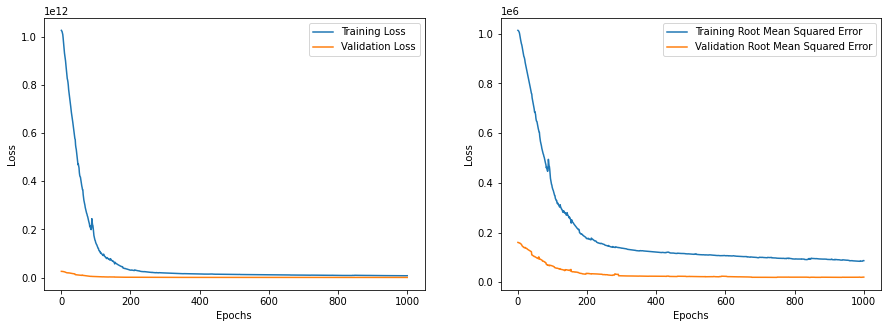

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

##### Predicting the closing stock price of Apple

In [ ]:
AAPL_prediction = AAPL_Model.predict(AAPL_Test_X)
AAPL_prediction = AAPL_prediction.reshape(-1,5)

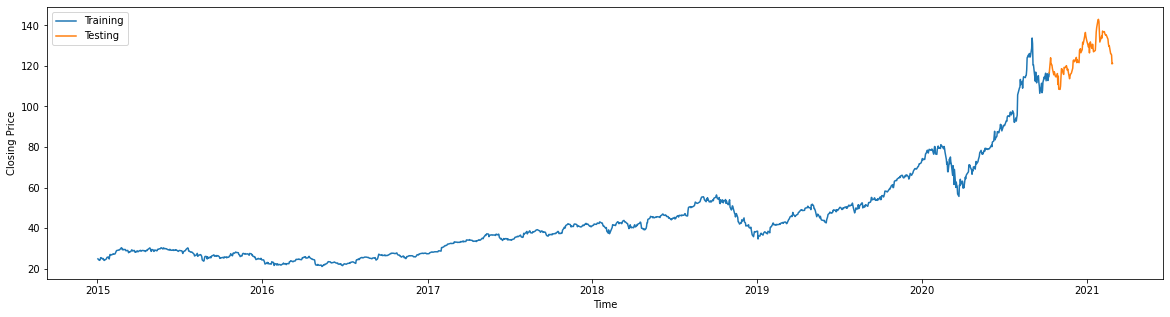

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(AAPL['Date'][AAPL['Date'] < '2020-10-12'], AAPL['Adj. Close'][AAPL['Date'] < '2020-10-12'], label = 'Training')
plt.plot(AAPL['Date'][AAPL['Date'] >= '2020-10-09'], AAPL['Adj. Close'][AAPL['Date'] >= '2020-10-09'], label = 'Testing')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [ ]:
rmse = math.sqrt(mean_squared_error(AAPL_Test_Y.reshape(-1, 5), AAPL_prediction))
mape = np.mean(np.abs(AAPL_prediction - AAPL_Test_Y.reshape(-1, 5))/np.abs(AAPL_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 20550.693515749437
MAPE: inf
